<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-35/blob/main/Reto/Reto_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 9 - Reto - Entrega 1**
 **Limpieza, análisis, visualización y kmeans**

Maestría en Inteligencia Artificial Aplicada

**Curso:** Ciencia y analítica de datos

Tecnológico de Monterrey

**Profesor Titular:**
- María de la Paz Rico Fernández

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de los estudiantes:**
- Alejandra Mendoza Flores - A01793032
- Fernando Sebastian Sanchez Cardona - A01687530

**Fecha:** 

16 de noviembre del 2022

#**Entrega 1**

http://201.116.60.46/

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 30.9 MB/s 
     |████████████████████████████████| 6.3 MB 68.5 MB/s 
     |████████████████████████████████| 16.7 MB 63.5 MB/s 


In [ ]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url="/content/drive/MyDrive/DATA/Colab Notebooks/Superficiales/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv"
df= pd.read_csv(url, encoding='latin-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,3493,3493,DLAGU8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,3493,3481,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,3493,13,LERMA SANTIAGO PACIFICO,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,3493,32,VERACRUZ DE IGNACIO DE LA LLAVE,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,3493,755,ACAPULCO DE JUAREZ,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUENCA,3492,521,YUCATAN (RESTO DE RH 32),101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUERPO DE AGUA,3479,1067,OCEANO PACIFICO,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO,3493,23,LOTICO,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,3479,27,RIO,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,3493.0,NaN,NaN,NaN,-100.359969,6.122773,-117.12403,-103.88231,-99.79553,-96.86023,-86.73215


1. Limpieza de base de datos.

Revisión de valores nulos

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

CALIDAD_TOX_FIS_FON_15    100.000000
TOX_FIS_FON_15_UT         100.000000
CALIDAD_TOX_D_48_FON      100.000000
TOX_D_48_FON_UT           100.000000
CALIDAD_OD_PORC_MED        88.239556
OD_PORC_MED                88.239556
CALIDAD TOX_D_48_SUP       81.598648
TOX_D_48_SUP_UT            81.598648
CALIDAD_ENTEROC            78.169524
ENTEROC_NMP_100mL          78.169524
CALIDAD_OD_PORC_FON        77.155277
OD_PORC_FON                77.155277
CALIDAD_OD_PORC_SUP        60.903163
OD_PORC_SUP                60.903163
TOX_FIS_SUP_15_UT          59.574982
CALIDAD_TOX_FIS_SUP_15     59.574982
CALIDAD_OD_PORC            56.604685
OD_PORC                    56.604685
TOX_D_48_UT                56.145858
CALIDAD_TOX_D_48           56.145858
CALIDAD_TOX_V_15           56.073412
TOX_V_15_UT                56.073412
CONTAMINANTES              46.244868
CALIDAD_DQO                37.672060
DQO_mg/L                   37.672060
CALIDAD_DBO                37.672060
DBO_mg/L                   37.672060
C

Se identificó que a partir de la fila 3494 no hay valores, se eliminarán las filas siguientes

In [ ]:
df[df['CLAVE'].isna()]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
3493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(how='all')

Estandarización de datos no disponibles, los datos no disponibles están marcado como ND en la columna Semaforo

In [ ]:
df = df.replace(['ND', ''], np.nan)

No hay datos en las columnas, se eliminarán

In [ ]:
df = df.drop(['TOX_D_48_FON_UT','CALIDAD_TOX_D_48_FON', 'TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'], axis=1)

Estandarizar los campos que son númericos y tienen valores del tipo <1, <2, <3, <10 con el valor indicado en el campo

In [ ]:
cols_menor_que = ['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'E_COLI_NMP_100mL', 
                  'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 
                  'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',
                  'COLI_FEC_NMP_100mL'
                  ]

df[cols_menor_que] = df[cols_menor_que].replace({'<1':1, '<2':2, '<3':3, '<10':10})

Reemplazar variables que contengan valores buleanos por 1(SI) y 0(NO)

In [ ]:
cols_si_no = ['CUMPLE_CON_DBO', 'CUMPLE_CON_DQO', 'CUMPLE_CON_SST',
              'CUMPLE_CON_CF', 'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 
              'CUMPLE_CON_OD', 'CUMPLE_CON_TOX'
                  ]

df[cols_si_no] = df[cols_si_no].replace({'SI':1, 'NO':0})

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,3493,3493,DLAGU8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,3493,3481,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,3493,13,LERMA SANTIAGO PACIFICO,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,3493,32,VERACRUZ DE IGNACIO DE LA LLAVE,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,3493,755,ACAPULCO DE JUAREZ,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUENCA,3492,521,YUCATAN (RESTO DE RH 32),101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUERPO DE AGUA,3479,1067,OCEANO PACIFICO,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO,3493,23,LOTICO,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,3479,27,RIO,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,3493.0,NaN,NaN,NaN,-100.359969,6.122773,-117.12403,-103.88231,-99.79553,-96.86023,-86.73215


Reemplazar variables que contengan valores en escala de likert por valores del 1 al 5
- Excelente = 5
- Buena calidad = 4
- Aceptable = 3
- Contaminada = 2
- Fuertemente contaminada = 1

In [ ]:
cols_calidad = ['CALIDAD_COLI_FEC', 'CALIDAD_DBO','CALIDAD_DQO',
'CALIDAD_E_COLI', 'CALIDAD_ENTEROC', 'CALIDAD_OD_PORC', 'CALIDAD_OD_PORC_FON',
'CALIDAD_OD_PORC_MED', 'CALIDAD_OD_PORC_SUP', 'CALIDAD_SST',
]


df[cols_calidad]=df[cols_calidad].replace({
'Excelente': 5,
'Buena calidad': 4,
'Aceptable': 3,
'Contaminada': 2,
'Fuertemente contaminada': 1

})

Reemplazar variables que contengan valores en escala de likert por valores del 1 al 4
- No toxico = 1
- Toxicidad baja = 3
- Toxicidad moderada = 4
- Toxicidad alta = 5

In [ ]:
df[['CALIDAD_TOX_D_48']].value_counts()

CALIDAD_TOX_D_48  
No Toxico             1729
Toxicidad moderada      52
Toxicidad baja          31
Toxicidad alta           4
dtype: int64

In [ ]:
cols_toxicidad = ['CALIDAD_TOX_D_48', 'CALIDAD_TOX_V_15',
                  'CALIDAD TOX_D_48_SUP', 'CALIDAD_TOX_FIS_SUP_15'
]

df[cols_toxicidad]=df[cols_toxicidad].replace({
  'No Toxico': 1,
  'Toxicidad baja': 2,
  'Toxicidad moderada': 3,
  'Toxicidad alta': 4
})

In [ ]:
df[['CALIDAD_TOX_D_48']].value_counts()

CALIDAD_TOX_D_48
1.0                 1729
3.0                   52
2.0                   31
4.0                    4
dtype: int64

Remplazar los calores de la columna Semáfoto de calidad de agua
- Verde = 1
- Amarillo = 2
- Rojo = 3 

In [ ]:
df[['SEMAFORO']].value_counts()

SEMAFORO
Verde       1267
Amarillo    1135
Rojo        1091
dtype: int64

In [ ]:
cols_semaforo = ['SEMAFORO']

df[cols_semaforo]=df[cols_semaforo].replace({
  'Verde': 1,
  'Amarillo': 2,
  'Rojo': 3
})

Revisión de tipos de datos

In [ ]:
df.dtypes

CLAVE                      object
SITIO                      object
ORGANISMO_DE_CUENCA        object
ESTADO                     object
MUNICIPIO                  object
CUENCA                     object
CUERPO DE AGUA             object
TIPO                       object
SUBTIPO                    object
LONGITUD                  float64
LATITUD                   float64
PERIODO                   float64
DBO_mg/L                   object
CALIDAD_DBO               float64
DQO_mg/L                   object
CALIDAD_DQO               float64
SST_mg/L                   object
CALIDAD_SST               float64
COLI_FEC_NMP_100mL         object
CALIDAD_COLI_FEC          float64
E_COLI_NMP_100mL           object
CALIDAD_E_COLI            float64
ENTEROC_NMP_100mL          object
CALIDAD_ENTEROC           float64
OD_PORC                    object
CALIDAD_OD_PORC           float64
OD_PORC_SUP                object
CALIDAD_OD_PORC_SUP       float64
OD_PORC_MED                object
CALIDAD_OD_POR

In [ ]:
flotantes = ['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'E_COLI_NMP_100mL', 
                  'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 
                  'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',
                  'COLI_FEC_NMP_100mL'
]

df[flotantes] = df[flotantes].astype(float)

Los valores enteros no se pueden convertir a int si existen valores ND, se solucionará más adelante

In [ ]:
enteros = [
  'CALIDAD_TOX_D_48',
  'CALIDAD_TOX_V_15',
  'CALIDAD TOX_D_48_SUP',
  'CALIDAD_TOX_FIS_SUP_15',
]

Revisión de valores nulos

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

CALIDAD_OD_PORC_MED       86.057830
OD_PORC_MED               86.057830
CALIDAD TOX_D_48_SUP      78.184941
TOX_D_48_SUP_UT           78.184941
ENTEROC_NMP_100mL         74.119668
CUMPLE_CON_ENTEROC        74.119668
CALIDAD_ENTEROC           74.119668
CALIDAD_OD_PORC_FON       72.917263
OD_PORC_FON               72.917263
CALIDAD_OD_PORC_SUP       53.650157
OD_PORC_SUP               53.650157
CALIDAD_TOX_FIS_SUP_15    52.075580
TOX_FIS_SUP_15_UT         52.075580
OD_PORC                   48.554251
CALIDAD_OD_PORC           48.554251
CALIDAD_TOX_D_48          48.010306
TOX_D_48_UT               48.010306
CALIDAD_TOX_V_15          47.924420
TOX_V_15_UT               47.924420
CONTAMINANTES             36.272545
CALIDAD_DQO               26.109362
DQO_mg/L                  26.109362
CALIDAD_DBO               26.109362
DBO_mg/L                  26.109362
CUMPLE_CON_DBO            26.109362
CUMPLE_CON_DQO            26.109362
CUMPLE_CON_CF             26.080733
CUMPLE_CON_E_COLI         26

Eliminar columnas cuyos valores faltantes son más del 50%

In [ ]:
faltantes_50 = percent_missing[percent_missing > 50].index
print(faltantes_50.shape)
df = df.drop(faltantes_50, axis=1)

(13,)


Reemplazar las discretas con la moda y las continuas con la media

- Discretas

In [ ]:
numericas_discretas = cols_si_no + cols_calidad + cols_toxicidad + ['SEMAFORO']
numericas_discretas = [col for col in numericas_discretas if col in df.columns]

df[numericas_discretas].median()

df[numericas_discretas] = df[numericas_discretas].fillna(df[numericas_discretas].median())

- Continuas

In [ ]:
numericas_continuas = flotantes
numericas_continuas = [col for col in numericas_continuas if col in df.columns]

df[numericas_continuas].mean()

df[numericas_continuas] = df[numericas_continuas].fillna(df[numericas_continuas].median())

Revisión de valores nulos

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

CONTAMINANTES          36.272545
CUERPO DE AGUA          0.400802
SUBTIPO                 0.400802
CUENCA                  0.028629
CLAVE                   0.000000
CALIDAD_OD_PORC         0.000000
TOX_D_48_UT             0.000000
CALIDAD_TOX_D_48        0.000000
TOX_V_15_UT             0.000000
CALIDAD_TOX_V_15        0.000000
SEMAFORO                0.000000
CUMPLE_CON_DQO          0.000000
CUMPLE_CON_DBO          0.000000
CALIDAD_E_COLI          0.000000
CUMPLE_CON_SST          0.000000
CUMPLE_CON_CF           0.000000
CUMPLE_CON_E_COLI       0.000000
CUMPLE_CON_OD           0.000000
CUMPLE_CON_TOX          0.000000
OD_PORC                 0.000000
CALIDAD_COLI_FEC        0.000000
E_COLI_NMP_100mL        0.000000
PERIODO                 0.000000
ORGANISMO_DE_CUENCA     0.000000
ESTADO                  0.000000
MUNICIPIO               0.000000
TIPO                    0.000000
LONGITUD                0.000000
LATITUD                 0.000000
DBO_mg/L                0.000000
SITIO     

Revisar que valores tenemos en las columnas faltantes por limpiar

In [ ]:
df[['CUENCA', 'SUBTIPO', 'CUERPO DE AGUA', 'CONTAMINANTES']].describe()

,CUENCA,SUBTIPO,CUERPO DE AGUA,CONTAMINANTES
count,3492,3479,3479,2226
unique,521,27,1067,96
top,YUCATAN (RESTO DE RH 32),RIO,OCEANO PACIFICO,"CF,E_COLI,"
freq,101,1478,139,439


Al tener pocos valores nulos, se eliminar las filas

In [ ]:
df = df[df['CUENCA'].notna()]
df = df[df['SUBTIPO'].notna()]

Revisión de valores nulos

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

CONTAMINANTES          36.170213
SEMAFORO                0.000000
CALIDAD_E_COLI          0.000000
OD_PORC                 0.000000
CALIDAD_OD_PORC         0.000000
TOX_D_48_UT             0.000000
CALIDAD_TOX_D_48        0.000000
TOX_V_15_UT             0.000000
CALIDAD_TOX_V_15        0.000000
CLAVE                   0.000000
SITIO                   0.000000
CUMPLE_CON_DBO          0.000000
CUMPLE_CON_DQO          0.000000
CUMPLE_CON_SST          0.000000
CUMPLE_CON_CF           0.000000
CUMPLE_CON_E_COLI       0.000000
CUMPLE_CON_OD           0.000000
CUMPLE_CON_TOX          0.000000
E_COLI_NMP_100mL        0.000000
CALIDAD_COLI_FEC        0.000000
COLI_FEC_NMP_100mL      0.000000
CALIDAD_SST             0.000000
ORGANISMO_DE_CUENCA     0.000000
ESTADO                  0.000000
MUNICIPIO               0.000000
CUENCA                  0.000000
CUERPO DE AGUA          0.000000
TIPO                    0.000000
SUBTIPO                 0.000000
LONGITUD                0.000000
LATITUD   

Al no representar valor para el futuro análisis se eliminará la columna CONTAMINANTES

In [ ]:
df = df.drop(['CONTAMINANTES'], axis=1)

Revisión de valores nulos

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

CLAVE                  0.0
CALIDAD_COLI_FEC       0.0
CALIDAD_E_COLI         0.0
OD_PORC                0.0
CALIDAD_OD_PORC        0.0
TOX_D_48_UT            0.0
CALIDAD_TOX_D_48       0.0
TOX_V_15_UT            0.0
CALIDAD_TOX_V_15       0.0
SEMAFORO               0.0
CUMPLE_CON_DBO         0.0
CUMPLE_CON_DQO         0.0
CUMPLE_CON_SST         0.0
CUMPLE_CON_CF          0.0
CUMPLE_CON_E_COLI      0.0
CUMPLE_CON_OD          0.0
CUMPLE_CON_TOX         0.0
E_COLI_NMP_100mL       0.0
COLI_FEC_NMP_100mL     0.0
SITIO                  0.0
CALIDAD_SST            0.0
ORGANISMO_DE_CUENCA    0.0
ESTADO                 0.0
MUNICIPIO              0.0
CUENCA                 0.0
CUERPO DE AGUA         0.0
TIPO                   0.0
SUBTIPO                0.0
LONGITUD               0.0
LATITUD                0.0
PERIODO                0.0
DBO_mg/L               0.0
CALIDAD_DBO            0.0
DQO_mg/L               0.0
CALIDAD_DQO            0.0
SST_mg/L               0.0
GRUPO                  0.0
d

Revisión de tipos de datos

In [ ]:
df.dtypes

CLAVE                   object
SITIO                   object
ORGANISMO_DE_CUENCA     object
ESTADO                  object
MUNICIPIO               object
CUENCA                  object
CUERPO DE AGUA          object
TIPO                    object
SUBTIPO                 object
LONGITUD               float64
LATITUD                float64
PERIODO                float64
DBO_mg/L               float64
CALIDAD_DBO            float64
DQO_mg/L               float64
CALIDAD_DQO            float64
SST_mg/L               float64
CALIDAD_SST            float64
COLI_FEC_NMP_100mL     float64
CALIDAD_COLI_FEC       float64
E_COLI_NMP_100mL       float64
CALIDAD_E_COLI         float64
OD_PORC                float64
CALIDAD_OD_PORC        float64
TOX_D_48_UT            float64
CALIDAD_TOX_D_48       float64
TOX_V_15_UT            float64
CALIDAD_TOX_V_15       float64
SEMAFORO                 int64
CUMPLE_CON_DBO         float64
CUMPLE_CON_DQO         float64
CUMPLE_CON_SST         float64
CUMPLE_C

In [ ]:
df[numericas_discretas] = df[numericas_discretas].astype(int)
df[['PERIODO']] = df[['PERIODO']].astype(int)

**¡Base de datos limpia!**

2. Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,3478.0,-100.391758,6.114533e+00,-117.12403,-103.903347,-99.814090,-96.905730,-8.673215e+01
LATITUD,3478.0,21.060174,3.896891e+00,14.53491,18.422230,20.158675,22.843522,3.270650e+01
PERIODO,3478.0,2020.000000,0.000000e+00,2020.00000,2020.000000,2020.000000,2020.000000,2.020000e+03
DBO_mg/L,3478.0,13.212173,5.645734e+01,2.00000,2.000000,2.630000,6.787500,1.500000e+03
CALIDAD_DBO,3478.0,4.278896,1.070088e+00,1.00000,3.000000,5.000000,5.000000,5.000000e+00
DQO_mg/L,3478.0,54.755323,1.300785e+02,10.00000,16.880000,27.010000,42.820000,2.871250e+03
CALIDAD_DQO,3478.0,3.140311,1.066596e+00,1.00000,2.000000,3.000000,4.000000,5.000000e+00
SST_mg/L,3478.0,102.427960,4.425300e+02,10.00000,10.000000,24.366650,57.635000,9.430000e+03
CALIDAD_SST,3478.0,4.153249,1.114565e+00,1.00000,4.000000,5.000000,5.000000,5.000000e+00
COLI_FEC_NMP_100mL,3478.0,71662.271708,1.007907e+06,3.00000,905.000000,2400.000000,11000.000000,2.419600e+07


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD               -100.391758
LATITUD                  21.060174
PERIODO                2020.000000
DBO_mg/L                 13.212173
CALIDAD_DBO               4.278896
DQO_mg/L                 54.755323
CALIDAD_DQO               3.140311
SST_mg/L                102.427960
CALIDAD_SST               4.153249
COLI_FEC_NMP_100mL    71662.271708
CALIDAD_COLI_FEC          2.269983
E_COLI_NMP_100mL      59008.728292
CALIDAD_E_COLI            3.308223
OD_PORC                  67.620472
CALIDAD_OD_PORC           3.931570
TOX_D_48_UT               1.032175
CALIDAD_TOX_D_48          1.042266
TOX_V_15_UT               1.416134
CALIDAD_TOX_V_15          1.103220
SEMAFORO                  1.951984
CUMPLE_CON_DBO            0.924669
CUMPLE_CON_DQO            0.732317
CUMPLE_CON_SST            0.889304
CUMPLE_CON_CF             0.269983
CUMPLE_CON_E_COLI         0.675388
CUMPLE_CON_OD             0.859402
CUMPLE_CON_TOX            0.976423
dtype: float64

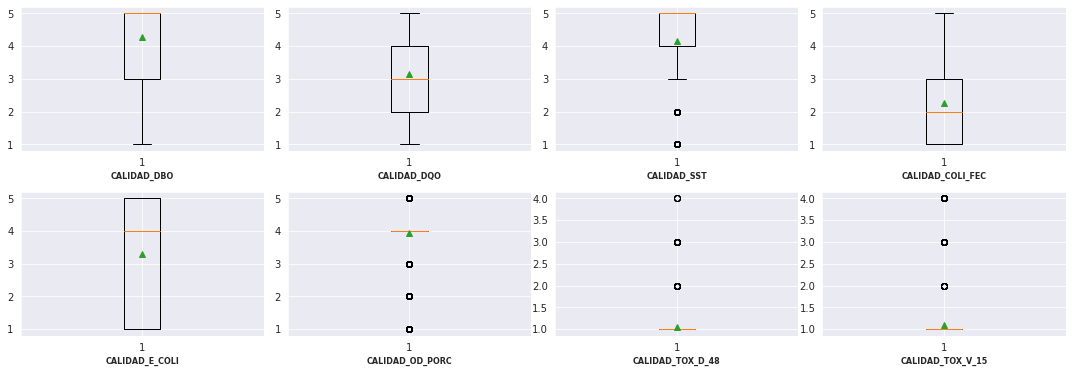

In [ ]:
numericas_discretas=[
    'CALIDAD_DBO', 'CALIDAD_DQO', 'CALIDAD_SST', 'CALIDAD_COLI_FEC',
    'CALIDAD_E_COLI', 'CALIDAD_OD_PORC', 'CALIDAD_TOX_D_48', 'CALIDAD_TOX_V_15'
]

plt.figure(figsize=(15,10))
plt. title ('BoxPlot de las Varibles Numericas Discretas', fontsize=15, weight='bold')

for i, var in enumerate (numericas_discretas):
  plt.subplot(4,4,1+i)
  plt.boxplot(df[var].dropna(), showmeans=True)
  plt.xlabel(var, fontsize=8, weight='bold')

plt.tight_layout()
plt. show ()

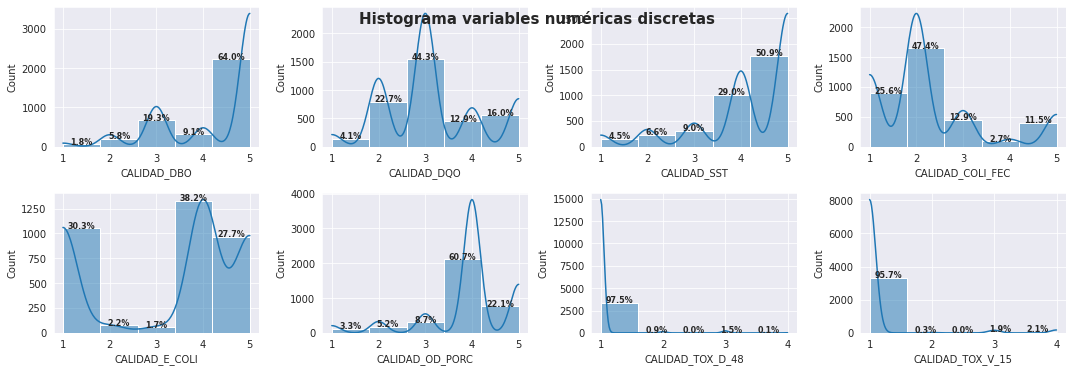

In [ ]:
plt.figure (figsize=(15,10))
plt.suptitle('Histograma variables numéricas discretas', fontsize=15, weight='bold')
for i, var in enumerate (numericas_discretas):
  plt.subplot(4,4,1+i)
  ax = sns.histplot(df[var].dropna(), kde=True, bins=5)
  total = len(df[var].dropna())
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(percentage, (x, y), ha='center', fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

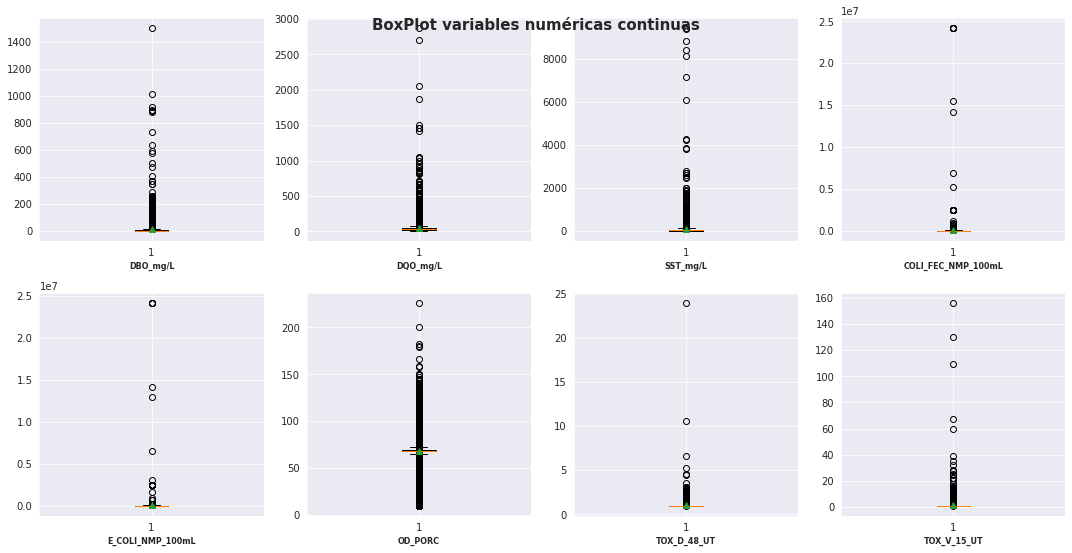

In [ ]:
numericas_continuas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL',
                       'E_COLI_NMP_100mL','OD_PORC','TOX_D_48_UT','TOX_V_15_UT']

plt.figure(figsize=(15,15))
plt.suptitle('BoxPlot variables numéricas continuas', fontsize=15, weight='bold')

for i, var in enumerate (numericas_continuas):
  plt.subplot(4,4,1+i)
  plt.boxplot(df[var].dropna(), showmeans=True)
  plt.xlabel(var, fontsize=8, weight='bold')
plt.tight_layout()
plt. show ()

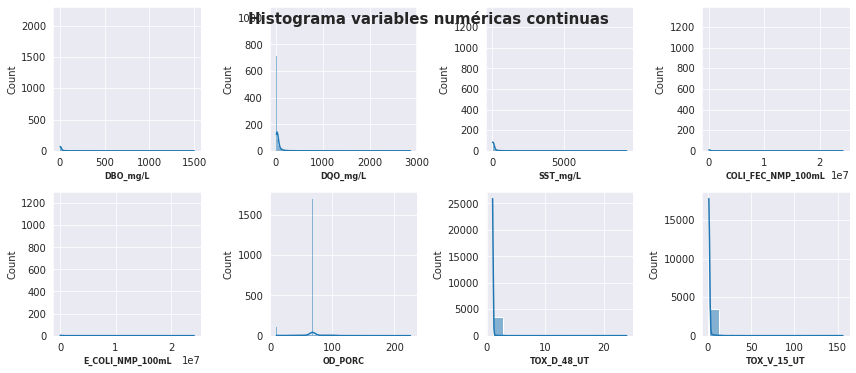

In [ ]:
plt.figure (figsize=(12,10))
plt.suptitle('Histograma variables numéricas continuas', fontsize=15, weight='bold')
for i, var in enumerate(numericas_continuas):
  plt.subplot(4,4,1+i)
  ax = sns.histplot(df[var].dropna(), kde=True)  
  plt.xlabel(var, fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

  - Identificando tendencias centrales promedio, media y mediana de los datos. 

In [ ]:
data = {
  'promedio': df.median(numeric_only=True),
  'media': df.mean(numeric_only=True),
  }

tendencias_centrales = pd.DataFrame(data)
tendencias_centrales

,promedio,media
LONGITUD,-99.814090,-100.391758
LATITUD,20.158675,21.060174
PERIODO,2020.000000,2020.000000
DBO_mg/L,2.630000,13.212173
CALIDAD_DBO,5.000000,4.278896
DQO_mg/L,27.010000,54.755323
CALIDAD_DQO,3.000000,3.140311
SST_mg/L,24.366650,102.427960
CALIDAD_SST,5.000000,4.153249
COLI_FEC_NMP_100mL,2400.000000,71662.271708


  - Identificar medidas de dispersión, máximo y mínimo .

In [ ]:
data = {
  'promedio': df.min(numeric_only=True).round(4),
  'media': df.max(numeric_only=True).round(4),
  }

tendencias_dispersion = pd.DataFrame(data)
tendencias_dispersion

,promedio,media
LONGITUD,-117.1240,-8.673220e+01
LATITUD,14.5349,3.270650e+01
PERIODO,2020.0000,2.020000e+03
DBO_mg/L,2.0000,1.500000e+03
CALIDAD_DBO,1.0000,5.000000e+00
DQO_mg/L,10.0000,2.871250e+03
CALIDAD_DQO,1.0000,5.000000e+00
SST_mg/L,10.0000,9.430000e+03
CALIDAD_SST,1.0000,5.000000e+00
COLI_FEC_NMP_100mL,3.0000,2.419600e+07


  - Identificar medidas de posición no centrales , los cuartiles , outliers.   

- Cuartiles

In [ ]:
df.quantile([0.25, 0.5, 0.75], numeric_only=True).T

,0.25,0.50,0.75
LONGITUD,-103.903347,-99.814090,-96.905730
LATITUD,18.422230,20.158675,22.843522
PERIODO,2020.000000,2020.000000,2020.000000
DBO_mg/L,2.000000,2.630000,6.787500
CALIDAD_DBO,3.000000,5.000000,5.000000
DQO_mg/L,16.880000,27.010000,42.820000
CALIDAD_DQO,2.000000,3.000000,4.000000
SST_mg/L,10.000000,24.366650,57.635000
CALIDAD_SST,4.000000,5.000000,5.000000
COLI_FEC_NMP_100mL,905.000000,2400.000000,11000.000000


- List outliers

In [ ]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

outliers = find_outliers_IQR(df[numericas_continuas])
print(outliers.shape)

outliers = find_outliers_IQR(df[numericas_discretas])
print(outliers.shape)

(3478, 8)
(3478, 8)


  - Identificar correlaciones.

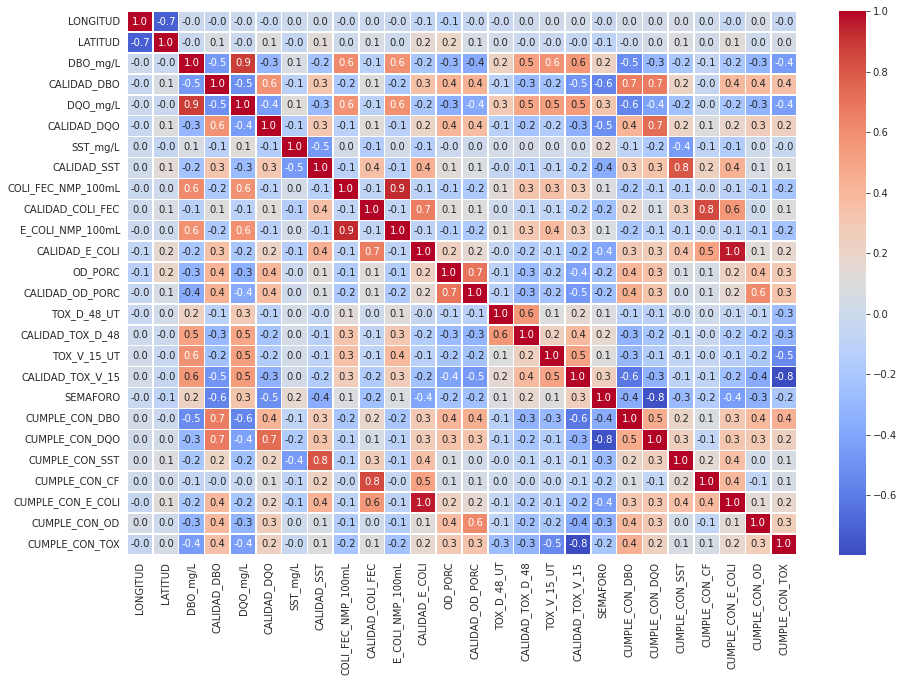

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.loc[:, df.columns != 'PERIODO'].select_dtypes(include = 'number').corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='coolwarm')

  - Preparar los datos 

3. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

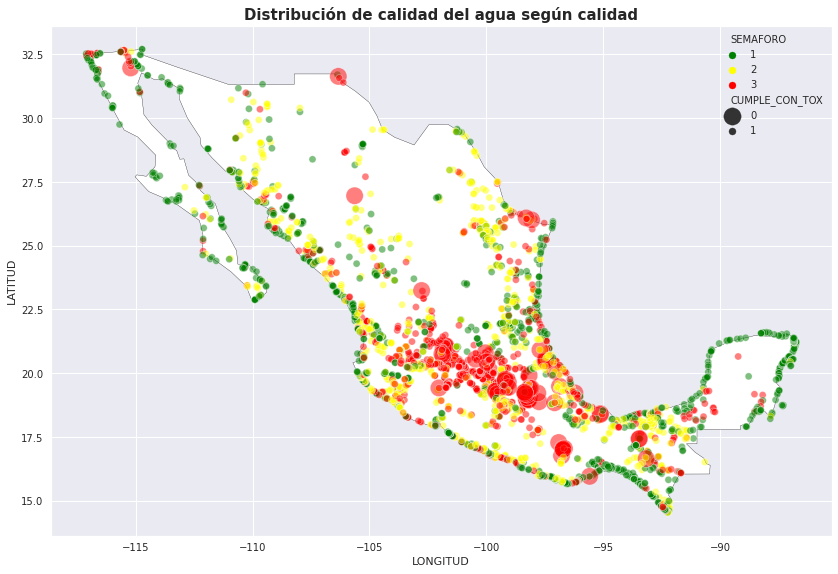

In [ ]:
fig, gax = plt.subplots(figsize=(14,10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x='LONGITUD', 
                y='LATITUD', 
                data=df, 
                hue='SEMAFORO', 
                palette=['green', 'yellow', 'red'], 
                alpha=0.5, 
                size='CUMPLE_CON_TOX', 
                sizes=(50, 300),
)

plt.title('Distribución de calidad del agua según calidad', fontsize=15, weight='bold')
plt.show()

X son las coordenadas

In [ ]:
X = df[['LONGITUD', 'LATITUD', 'SEMAFORO', 'CUMPLE_CON_TOX']]

Iniciamos el modelo

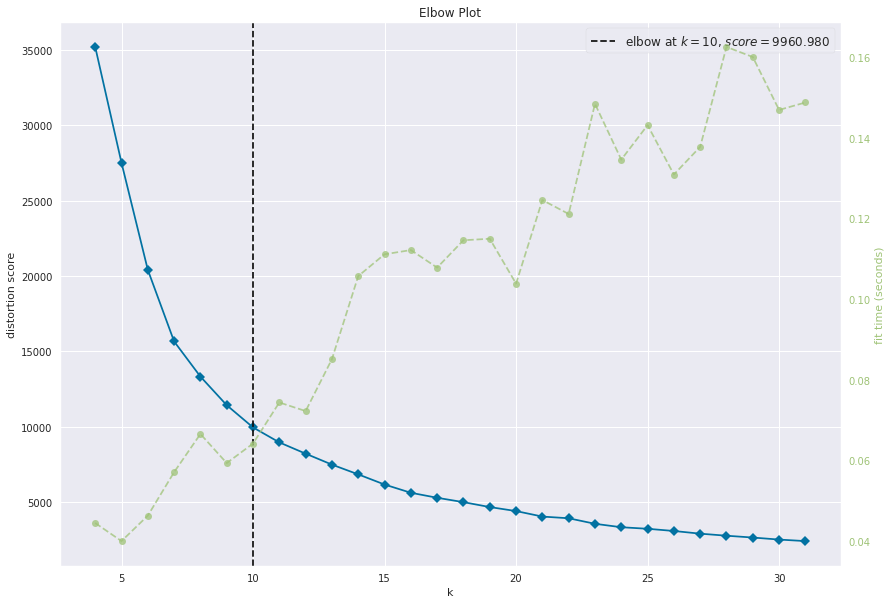

In [ ]:
plt.subplots(figsize=(14,10))
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,32))
visualizer.fit(X)
visualizer.title = 'Elbow Plot'
visualizer.show()

4. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Se busca comprobar si existe una correlación entre la ubicación y la calidad del agua

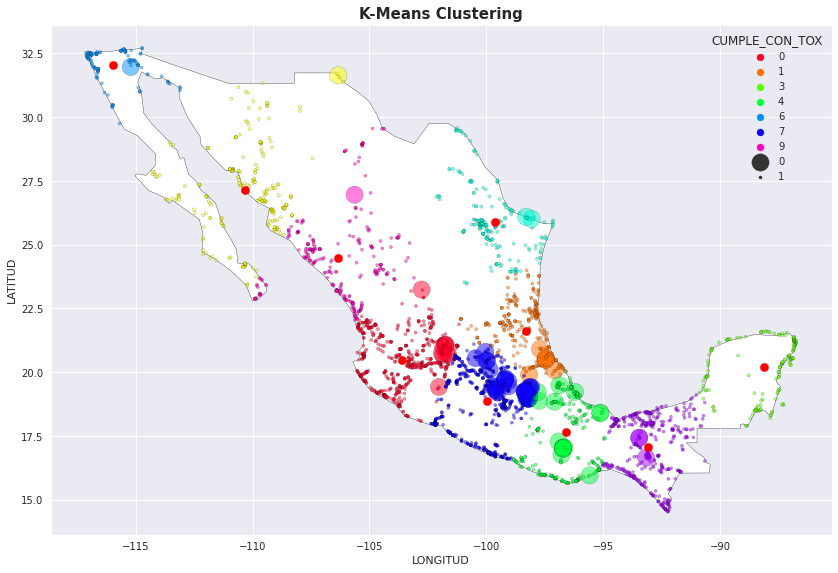

In [ ]:
k = 10 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
fig, gax = plt.subplots(figsize=(14, 10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black', color='white')
sns.scatterplot(
              x='LONGITUD',
              y='LATITUD',
              data=X,
              hue=y_pred,
              palette='gist_rainbow',
              alpha=0.5,
              size='CUMPLE_CON_TOX',
              sizes=(10, 300),
              edgecolor='black',
)


plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=70, 
            c='red', 
            )

plt.title('K-Means Clustering', fontsize=15, weight='bold')
plt.show()